In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import time
from datetime import datetime
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
#For city data retrieval using citipy library to generate random geographic coordinates
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
# For city data retrieval using citipy library to generate random geographic coordinates
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
#build url
query_url = f"{url}appid={weather_api_key}&units={units}&q="



#wdata = requests.get(url+city).json()
# Define an empty list to fetch the weather data for each city
city_name = []
city_data = []
cloudiness = [] 
country = []     
date = []         
humidity = []     
lat = []       
lng = []         
max_temp = []     
wind_speed = []  


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


# Using the OpenWeatherMap API to retrieve weather data for each city.
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url+city
    response = requests.get(city_url).json()

    print(f'Processing Record {record_count} | {city}')
    #print(city_url)
    

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city = city_name.append(city_weather["name"])
        city_lat = lat.append(city_weather["coord"]["lat"])
        city_lng = lng.append(city_weather["coord"]["lon"])
        city_max_temp = max_temp.append(city_weather["main"]["temp_max"])
        city_humidity = humidity.append(city_weather["main"]["humidity"])
        city_clouds = cloudiness.append(city_weather["clouds"]["all"])
        city_wind = wind_speed.append(city_weather["wind"]["speed"])
        city_country = country.append(city_weather["sys"]["country"])
        city_date = date.append(city_weather["dt"])

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        
        pass

    # pause to avoid rate limiting
    #time.sleep(1)


# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 | iqaluit
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 | wailua homesteads
Processing Record 2 of Set 1 | wailua homesteads
Processing Record 3 | atafu village
Processing Record 3 of Set 1 | atafu village
Processing Record 4 | manokwari
Processing Record 4 of Set 1 | manokwari
Processing Record 5 | xining
Processing Record 5 of Set 1 | xining
Processing Record 6 | essaouira
Processing Record 6 of Set 1 | essaouira
Processing Record 7 | pingzhuang
Processing Record 7 of Set 1 | pingzhuang
Processing Record 8 | bilibino
Processing Record 8 of Set 1 | bilibino
Processing Record 9 | idri
Processing Record 9 of Set 1 | idri
Processing Record 10 | polyarnyy
Processing Record 10 of Set 1 | polyarnyy
Processing Record 11 | limuru
Processing Record 11 of Set 1 | limuru
Processing Record 12 | port-aux-francais
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 | kodiak
Processing Rec

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({
     'City':city_name,
     'Lat':lat,
     'Lng':lng,
     'Max Temperature':max_temp,
     'Humidity':humidity,
     'Cloudiness':cloudiness,
     'Wind Speed':wind_speed,
     'Country':country,
     'Date':date,
     })


# Show Record Count
city_data_df.count()

City               596
Lat                596
Lng                596
Max Temperature    596
Humidity           596
Cloudiness         596
Wind Speed         596
Country            596
Date               596
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Iqaluit,63.7506,-68.5145,8.85,76,40,2.57,CA,1720631878
1,Wailua Homesteads,22.0669,-159.3780,24.44,86,0,7.20,US,1720631878
2,Atafu Village,-8.5421,-172.5159,28.73,69,95,7.12,TK,1720631878
3,Manokwari,-0.8667,134.0833,25.04,83,75,1.91,ID,1720631878
4,Xining,36.6167,101.7667,15.50,80,75,0.47,CN,1720631878


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Iqaluit,63.7506,-68.5145,8.85,76,40,2.57,CA,1720631878
1,Wailua Homesteads,22.0669,-159.3780,24.44,86,0,7.20,US,1720631878
2,Atafu Village,-8.5421,-172.5159,28.73,69,95,7.12,TK,1720631878
3,Manokwari,-0.8667,134.0833,25.04,83,75,1.91,ID,1720631878
4,Xining,36.6167,101.7667,15.50,80,75,0.47,CN,1720631878


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

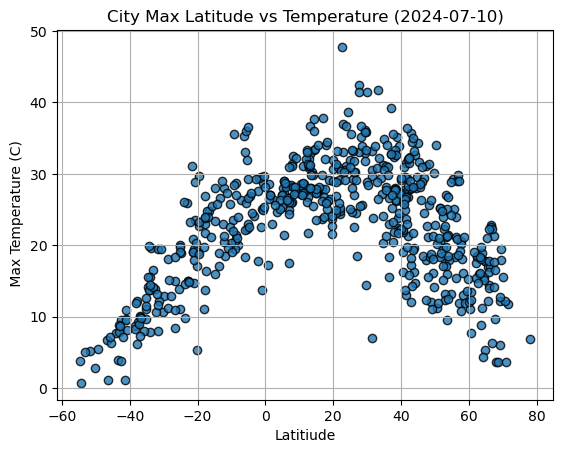

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temperature"]
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel("Latitiude")
plt.ylabel(" Max Temperature (C)")
date_time = datetime.date(datetime.now())

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs Temperature ({date_time})")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")


# Show plot
plt.show()

#### Latitude Vs. Humidity

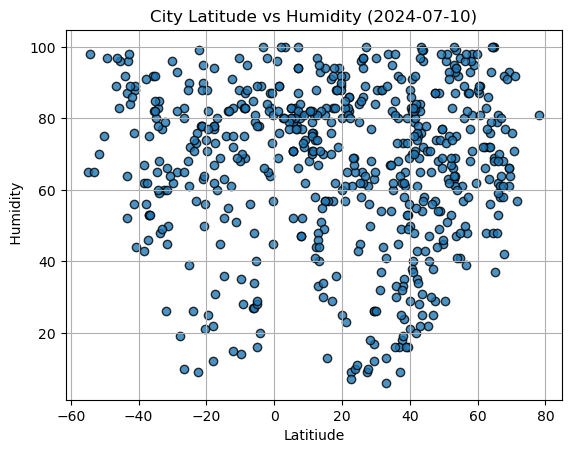

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel("Latitiude")
plt.ylabel(" Humidity")
date_time = datetime.date(datetime.now())

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity ({date_time})")
plt.grid()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

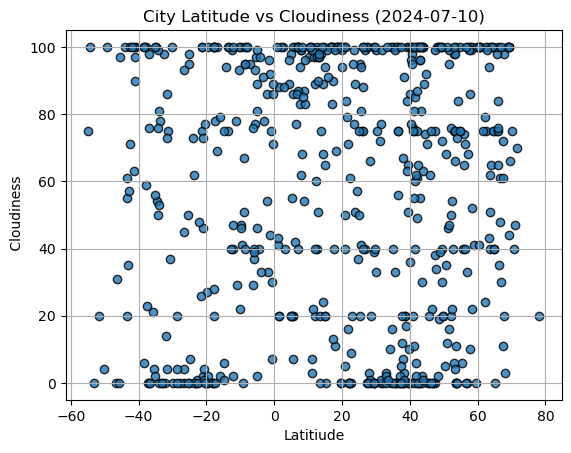

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel("Latitiude")
plt.ylabel(" Cloudiness")
date_time = datetime.date(datetime.now())

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness ({date_time})")
plt.grid()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

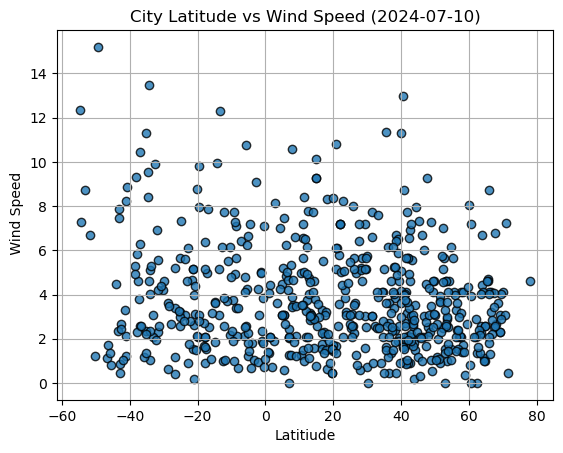

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel("Latitiude")
plt.ylabel(" Wind Speed")
date_time = datetime.date(datetime.now())

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed ({date_time})")
plt.grid()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def createregression(x_values, y_values, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

    # Perform linear regression

    regress = x_values * slope + intercept

    # Perform linear regression
#slope, intercept, r_value, p_value, std_err = st.linregress(x, y)


    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
    plt.xlabel(x_label,fontsize = 14)
    plt.ylabel(y_label,fontsize = 14)

    
    plt.title(f"{x_label} vs {y_label}",fontsize = 15)
    
    plt.annotate(line_eq, (35,2), fontsize = 14, color = 'red')
    plt.annotate(line_eq, (-45,20), fontsize = 14, color = 'red')
   # plt.annotate(line_eq, (50,8), fontsize = 14, color = 'red')


    
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    return plt.plot(x_values,regress,"r-")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Iqaluit,63.7506,-68.5145,8.85,76,40,2.57,CA,1720631878
1,Wailua Homesteads,22.0669,-159.3780,24.44,86,0,7.20,US,1720631878
4,Xining,36.6167,101.7667,15.50,80,75,0.47,CN,1720631878
5,Mogador,31.5125,-9.7700,29.72,54,0,7.72,MA,1720631878
6,Pingzhuang,42.0372,119.2889,21.35,35,61,2.12,CN,1720631879


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,Atafu Village,-8.5421,-172.5159,28.73,69,95,7.12,TK,1720631878
3,Manokwari,-0.8667,134.0833,25.04,83,75,1.91,ID,1720631878
10,Limuru,-1.1000,36.6500,13.69,87,92,2.35,KE,1720631879
11,Port-aux-Français,-49.3500,70.2167,5.46,97,100,15.20,TF,1720631879
13,Carnarvon,-24.8667,113.6333,18.86,72,7,7.32,AU,1720631879


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.3461014085448409
The correlation between both factors is -0.59


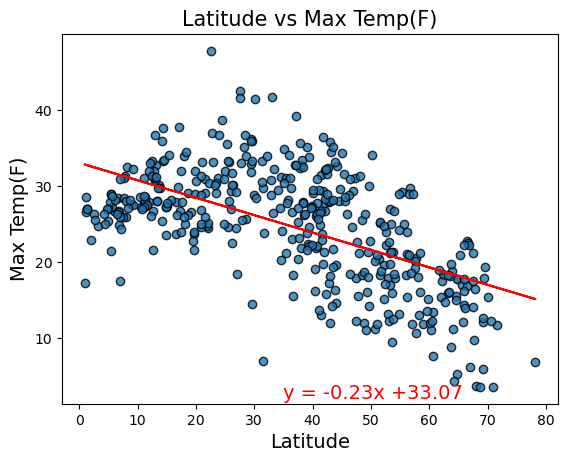

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temperature']
createregression(x_values, y_values, "Latitude", "Max Temp(F)")
#plt.annotate(line_eq, (18,36), fontsize = 22, color = 'red')


plt.show()

The r-squared is: 0.7059073297419416
The correlation between both factors is 0.84


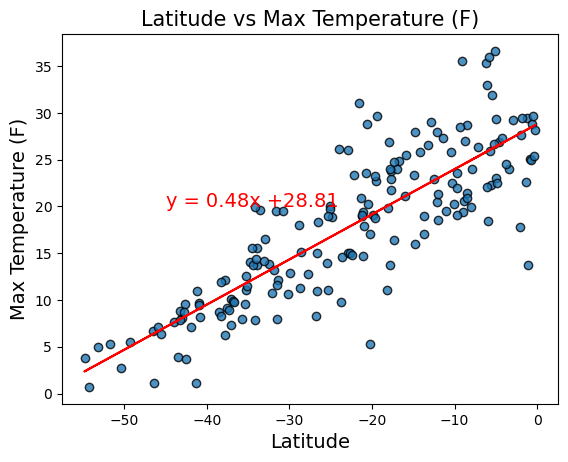

In [27]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temperature']
createregression(x_values, y_values, "Latitude", "Max Temperature (F)")


plt.show()

**Discussion about the linear relationship:**
For the Northern Hemisphere - The temperatures decrease as the cities get further from the equator which means as the latitude increases the temperature decreases. Therefore there is a negative correlation between latitude and temperature with a correlation of -0.21
For the Southern Hemisphere there is a clear positive coorelation between the temperature and latitude which indicates that as the latitiude increases and gets cloer to the equator the temperature rises. Both graphs indicate that the closer you get to the equatore the higher the temperature is.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 6.275644201967318e-05
The correlation between both factors is -0.01


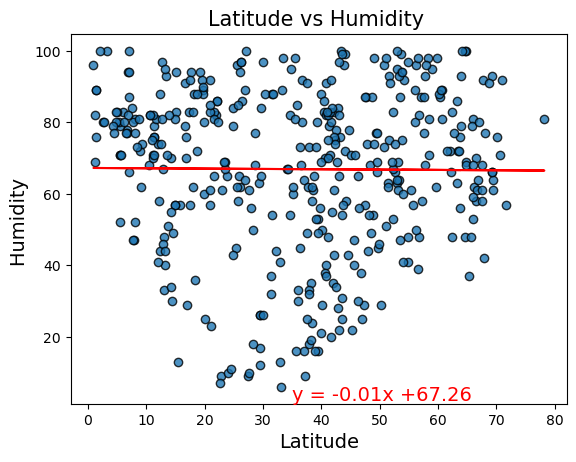

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
createregression(x_values, y_values, "Latitude", "Humidity ")


plt.show()

The r-squared is: 0.0221317860614109
The correlation between both factors is -0.15


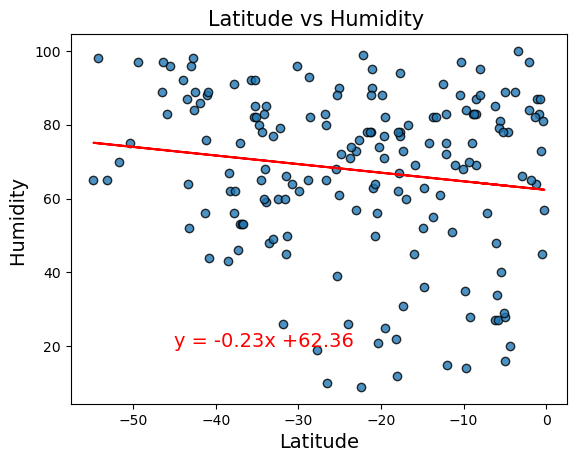

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
createregression(x_values, y_values, "Latitude", "Humidity ")

plt.show()

**Discussion about the linear relationship:** 

There doesn't seem to be a  clear correlation between humidity and latitidue although the regression line indicates a negative correlation for both hemispheres which is is small correlation of -0.11 and -0.2. Humidity values are scattered all over with high and low values at the same latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.008515084285618311
The correlation between both factors is -0.09


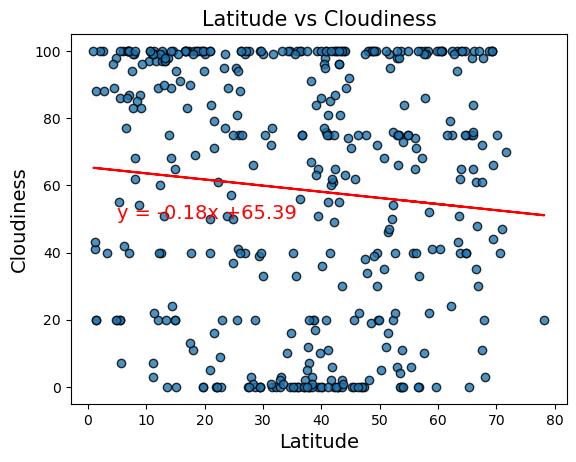

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
# Perform linear regression
regress = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel("Latitude",fontsize = 14)
plt.ylabel("Cloudiness",fontsize = 14)
   
plt.title("Latitude vs Cloudiness", fontsize = 15)
    
plt.annotate(line_eq, (5,50), fontsize = 14, color = 'red')
print(f"The r-squared is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(x_values,regress,"r-")
plt.show()


plt.show()

The r-squared is: 0.011580660055372493
The correlation between both factors is 0.11


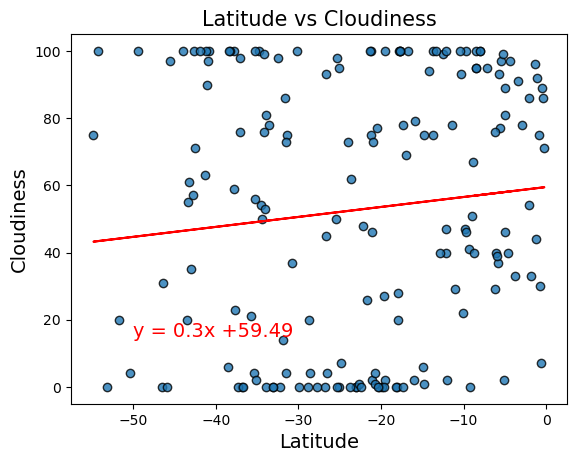

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
# Perform linear regression
regress = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel("Latitude",fontsize = 14)
plt.ylabel("Cloudiness",fontsize = 14)
   
plt.title("Latitude vs Cloudiness", fontsize = 15)
    
plt.annotate(line_eq, (-50,15), fontsize = 14, color = 'red')
print(f"The r-squared is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(x_values,regress,"r-")

plt.show()

**Discussion about the linear relationship:** 
For the Northern Hemisphere there is a slight negative correlation(of -0.3) between latitude and Cloudiness  and for the Southern Hemisphere there is a slight positive correlation between cloudiness and latitude. Overall there is no clear relationship between cloudiness and Latitude.


### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.013326251828660199
The correlation between both factors is -0.12


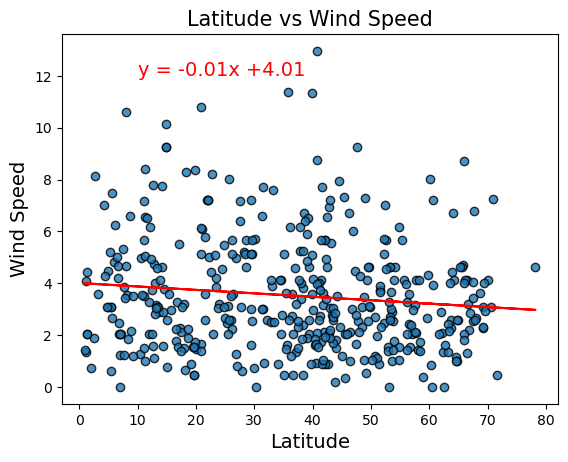

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
# Perform linear regression
regress = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel("Latitude",fontsize = 14)
plt.ylabel("Wind Speed",fontsize = 14)
   
plt.title("Latitude vs Wind Speed", fontsize = 15)
    
plt.annotate(line_eq, (10,12), fontsize = 14, color = 'red')
print(f"The r-squared is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(x_values,regress,"r-")
plt.show()

The r-squared is: 0.022072319491558516
The correlation between both factors is -0.15


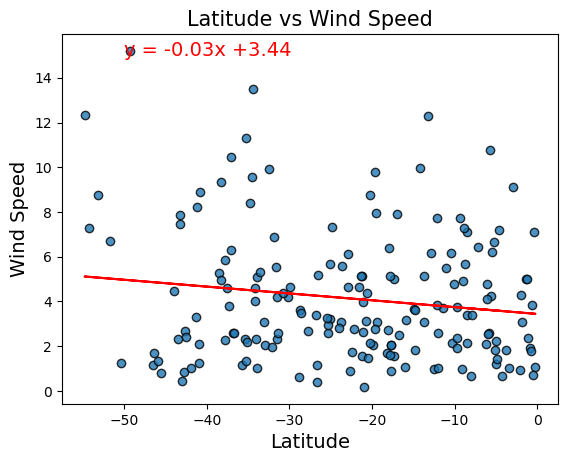

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
# Perform linear regression
regress = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel("Latitude",fontsize = 14)
plt.ylabel("Wind Speed",fontsize = 14)
   
plt.title("Latitude vs Wind Speed", fontsize = 15)
    
plt.annotate(line_eq, (-50,15), fontsize = 14, color = 'red')
print(f"The r-squared is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(x_values,regress,"r-")
plt.show()

**Discussion about the linear relationship:** 

For the Northern Hemisphere there is no correlation between latitude and wind speed as the correlation cooefficent is zero. - The data is spread all over with cities having different high and low wind speeds at the same latitude.
For the Southern hemisphere there is a slight negative correlation of -0.04 but here too the wind speed varies for cities on the same latitude.